Por favor, sube el archivo Excel que contiene los datos de log DPI.


Saving ARIMA.xlsx to ARIMA (5).xlsx

Columnas en el archivo subido:
Index(['YEAR', 'GDP', 'PDI', 'PCE', 'PROFITS', 'DIVIDENDS', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

Por favor, ingrese el nombre de la columna para los datos de log DPI: PDI


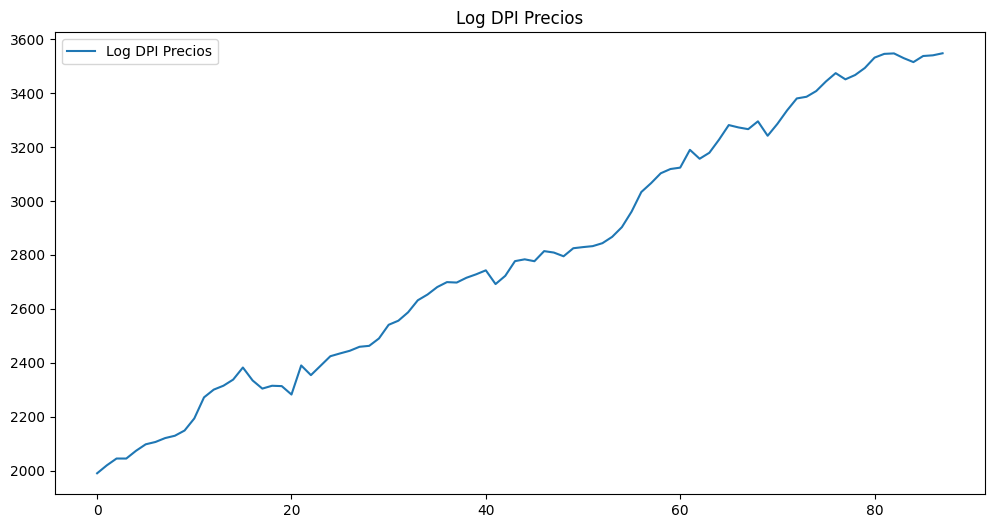

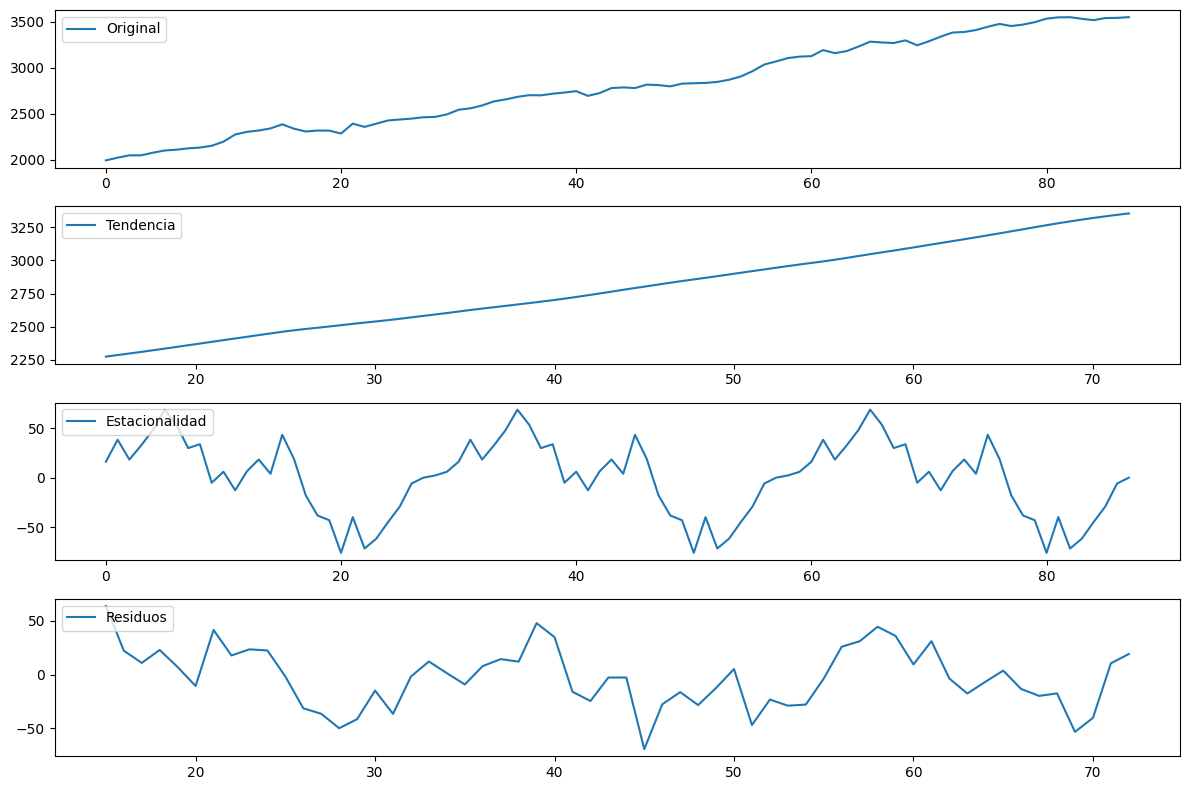


Análisis para Log DPI:
- Tendencia: Verifique la trama de tendencia para pendientes ascendentes/descendentes.
- Estacionalidad: Los patrones repetitivos en la trama de estacionalidad sugieren estacionalidad.

Pruebas de raíz unitaria para Log DPI:
Prueba ADF:
Estadístico ADF: -0.6716, p-valor: 0.8540
Interpretación: No estacionario

Prueba KPSS:
Estadístico KPSS: 1.5563, p-valor: 0.0100
Interpretación: No estacionario

División de datos: Entrenamiento=79, Prueba=9


<ipython-input-10-f816d548673c>:60: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/st


Mejor modelo ARMA para Log DPI: (3, 0, 1), AIC: 776.22


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


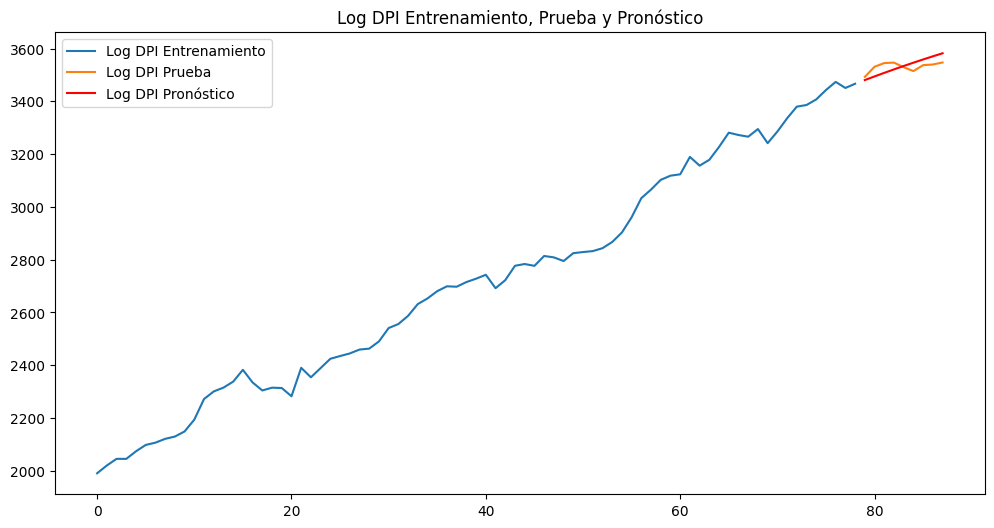


Precisión del pronóstico:
Log DPI MSE: 801.17

Interpretación de los Resultados del Modelo ARIMA para Log DPI:
Resumen del Modelo:
                               SARIMAX Results                                
Dep. Variable:                    PDI   No. Observations:                   79
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -382.111
Date:                Fri, 14 Mar 2025   AIC                            776.222
Time:                        18:18:19   BIC                            790.438
Sample:                             0   HQIC                           781.917
                                 - 79                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2717.6134    515.178      5.275      0.000    1707.883    3727.344

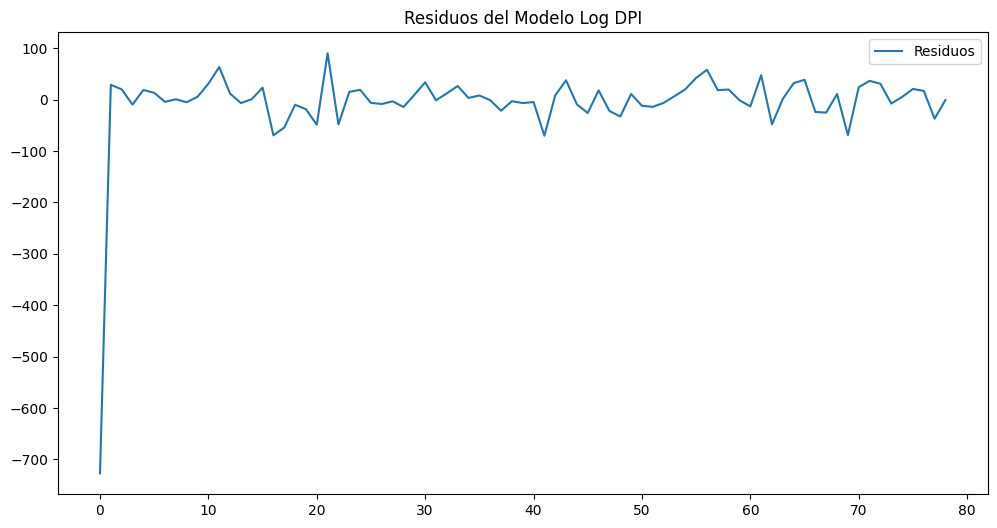

Análisis de los Residuos:
- Media: -7.0286
- Varianza: 7580.1696
- Deben estar cerca de 0 y no mostrar patrones si los residuos son puramente aleatorios.


In [10]:
import pandas as pd
import numpy as np
from google.colab import files
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Cargar datos
def load_data():
    print("Por favor, sube el archivo Excel que contiene los datos de log DPI.")
    upload = files.upload()
    filename = list(upload.keys())[0]
    df = pd.read_excel(filename)
    return df

# Graficar tendencia y estacionalidad
def plot_trend_seasonality(series, name):
    plt.figure(figsize=(12, 6))
    plt.plot(series, label=f'{name} Precios')
    plt.title(f'{name} Precios')
    plt.legend()
    plt.show()

    decomposition = seasonal_decompose(series, model='additive', period=30)
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(series, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Tendencia')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal, label='Estacionalidad')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuos')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

    print(f"\nAnálisis para {name}:")
    print("- Tendencia: Verifique la trama de tendencia para pendientes ascendentes/descendentes.")
    print("- Estacionalidad: Los patrones repetitivos en la trama de estacionalidad sugieren estacionalidad.")

# Realizar pruebas de raíz unitaria
def unit_root_tests(series, name):
    print(f"\nPruebas de raíz unitaria para {name}:")
    adf_result = adfuller(series)
    print("Prueba ADF:")
    print(f'Estadístico ADF: {adf_result[0]:.4f}, p-valor: {adf_result[1]:.4f}')
    print("Interpretación:", "Estacionario" if adf_result[1] < 0.05 else "No estacionario")

    kpss_result = kpss(series)
    print("\nPrueba KPSS:")
    print(f'Estadístico KPSS: {kpss_result[0]:.4f}, p-valor: {kpss_result[1]:.4f}')
    print("Interpretación:", "No estacionario" if kpss_result[1] < 0.05 else "Estacionario")

# Encontrar el mejor modelo ARMA
def find_best_arma(series, name, max_p=3, max_q=3):
    best_aic = float('inf')
    best_order = None
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(series, order=(p, 0, q))
                results = model.fit()
                if results.aic < best_aic:
                    best_aic = results.aic
                    best_order = (p, 0, q)
            except:
                continue
    if best_order is None:
        best_order = (1, 0, 1)
    print(f"\nMejor modelo ARMA para {name}: {best_order}, AIC: {best_aic:.2f}")
    return best_order

# Graficar entrenamiento, prueba y pronóstico
def plot_train_test_forecast(train, test, forecast, name):
    forecast_index = range(len(train), len(train) + len(test))
    plt.figure(figsize=(12, 6))
    plt.plot(train, label=f'{name} Entrenamiento')
    plt.plot(range(len(train), len(train) + len(test)), test, label=f'{name} Prueba')
    plt.plot(forecast_index, forecast, label=f'{name} Pronóstico', color='red')
    plt.title(f'{name} Entrenamiento, Prueba y Pronóstico')
    plt.legend()
    plt.show()

# Interpretar resultados del modelo ARIMA
def interpret_model_results(model, name):
    print(f"\nInterpretación de los Resultados del Modelo ARIMA para {name}:")
    print("Resumen del Modelo:")
    print(model.summary())

    # Significancia de los coeficientes
    print("\nSignificancia de los Coeficientes:")
    for param, pvalue in zip(model.params.index, model.pvalues):
        if pvalue < 0.05:
            print(f"{param}: Significativo (p-valor = {pvalue:.4f})")
        else:
            print(f"{param}: No significativo (p-valor = {pvalue:.4f})")

    # Análisis de los residuos
    residuals = model.resid
    plt.figure(figsize=(12, 6))
    plt.plot(residuals, label='Residuos')
    plt.title(f'Residuos del Modelo {name}')
    plt.legend()
    plt.show()

    print("Análisis de los Residuos:")
    print("- Media: {:.4f}".format(residuals.mean()))
    print("- Varianza: {:.4f}".format(residuals.var()))
    print("- Deben estar cerca de 0 y no mostrar patrones si los residuos son puramente aleatorios.")

# Función principal
def main():
    # Cargar datos
    df = load_data()

    # Imprimir nombres de columnas
    print("\nColumnas en el archivo subido:")
    print(df.columns)

    # Solicitar al usuario el nombre correcto de la columna
    column_name = input("\nPor favor, ingrese el nombre de la columna para los datos de log DPI: ")

    # Asegurarse de que la columna exista
    if column_name not in df.columns:
        print(f"Error: La columna '{column_name}' no existe en el DataFrame.")
        return

    series = df[column_name].dropna()

    # Graficar tendencia y estacionalidad
    plot_trend_seasonality(series, 'Log DPI')

    # Realizar pruebas de raíz unitaria
    unit_root_tests(series, 'Log DPI')

    # Dividir los datos en entrenamiento (90%) y prueba (10%)
    train_size = int(len(series) * 0.9)
    train, test = series[:train_size], series[train_size:]

    print(f"\nDivisión de datos: Entrenamiento={len(train)}, Prueba={len(test)}")

    # Ajustar modelo ARMA
    order = find_best_arma(train, 'Log DPI')
    model = ARIMA(train, order=order).fit()

    # Pronóstico
    steps = len(test)
    forecast = model.forecast(steps=steps)

    # Graficar resultados
    plot_train_test_forecast(train, test, forecast, 'Log DPI')

    # Evaluar precisión
    mse = mean_squared_error(test, forecast)
    print(f"\nPrecisión del pronóstico:")
    print(f"Log DPI MSE: {mse:.2f}")

    # Interpretar resultados del modelo
    interpret_model_results(model, 'Log DPI')

# Ejecutar la función principal
if __name__ == "__main__":
    main()